In [76]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
from pylab import *
from numpy import*
import pandas as pd

In [124]:
ecgsignal = np.load('train/00009_hr.npy').transpose().reshape((60000,))

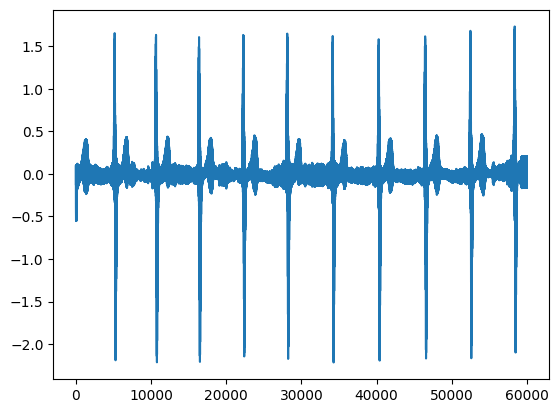

In [125]:
plt.plot(ecgsignal)

In [126]:
print(ecgsignal)

[-0.12  -0.085  0.035 ...  0.14   0.13   0.07 ]


In [127]:
def cardio_removelowerfrequencies(ecg, samplingrate):
    fresult = np.fft.fft(ecg)
    fresult[:round(len(fresult)*5/samplingrate)] = 0
    fresult[-round(len(fresult)*5/samplingrate)+1:] = 0
    corrected = np.real(np.fft.ifft(fresult))
    return corrected

In [128]:
ecgsignal -= cardio_removelowerfrequencies(ecgsignal, 250)

In [129]:
print(ecgsignal)

[-0.03376563 -0.04526234 -0.05675128 ...  0.00016264 -0.01099301
 -0.02232229]


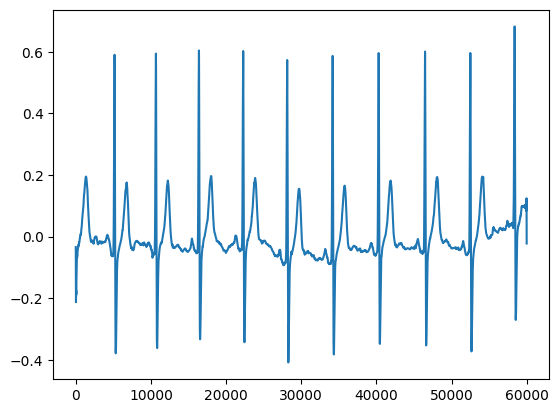

In [130]:
plt.plot(ecgsignal)

In [131]:
x = linspace (0,  1,  num = 2048)
data = sin (250  *  pi * x**2)
coefs=pywt.downcoef('a', data, 'db20', mode='symmetric', level=1)

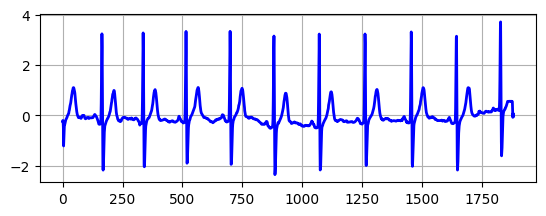

In [132]:
st='sym5'
coeffs = pywt.wavedec(ecgsignal, st, level=5)
subplot(2, 1, 1)
plot(coeffs[0],'b',linewidth=2, label='cA,level-5')
grid()

In [133]:
len(coeffs[0])

1883

In [134]:
ecgsignal = coeffs[0]